# Dropout and Batch Normalization
Add these special layers to prevent overfitting and stabilize training.


# 🧠 Special Layers in Deep Learning: Dropout & Batch Normalization

There's more to deep learning than just dense layers! 🤯  
Keras offers a variety of layers beyond the usual ones. Some define neuron connections, while others handle preprocessing or transformations.

In this lesson, we explore two powerful types of layers — **Dropout** and **Batch Normalization** — which don’t have neurons themselves but can *greatly* enhance your model’s performance. ⚙️🚀

---

## 🎲 Dropout: Fighting Overfitting

Dropout helps combat overfitting by randomly "dropping out" (setting to 0) a fraction of input units during training. 🧩

### 💡 Why It Works

Overfitting happens when a network learns noisy or irrelevant patterns — often depending on very specific combinations of weights, like a "conspiracy" 🕵️‍♀️ of neurons. Dropout disrupts these by forcing the model to learn more robust, general patterns.

Think of dropout as training an **ensemble** of smaller networks. Each one sees a slightly different version of the data, and together, they act like a **wise committee** 🤝 making more balanced predictions.

### 🔧 Adding Dropout in Keras

```python
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3),  # 🙈 Randomly drop 30% of inputs
    layers.Dense(16),
    # ...
])
```

---

## 📦 Batch Normalization: Faster, Stable Training

Batch Normalization (BatchNorm) helps stabilize and speed up training by normalizing the inputs of a layer. 📊

### 📐 Why It’s Useful

Neural networks can train poorly if features vary too much in scale. Normally we fix this with `StandardScaler` or `MinMaxScaler` before training, but **BatchNorm does it inside the network**!

For each batch:
- Normalizes with the batch’s **mean and std**
- Applies **trainable scale and shift**

### 🧪 Benefits

- Faster convergence ⏩  
- Smoother training curves 📈  
- Can even help with accuracy 🏅  

### 🔧 Using BatchNorm in Keras

**After a layer:**
```python
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

**Between a layer and its activation:**
```python
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

**At the input of the network (adaptive preprocessor):**
```python
keras.Sequential([
    layers.BatchNormalization(input_shape=(...)),
    # ...
])
```

---

## 📚 Summary

| Layer                 | Purpose                              | Benefit                              |
|----------------------|--------------------------------------|--------------------------------------|
| 🎲 Dropout            | Randomly disables units during training | Prevents overfitting                 |
| 📦 Batch Normalization| Normalizes inputs within the network   | Faster, more stable training         |

👉 Try combining both in your deep learning models for better results! 💪🤖
```


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('dl-course-data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


# 1) Add Dropout to Spotify Model

Here is the last model from Course 4. Add two dropout layers, one after the `Dense` layer with 128 units, and one after the `Dense` layer with 64 units. Set the dropout rate on both to `0.3`.

In [9]:
#Add two 30% dropout layers, one after 128 and one after 64
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])


c:\Users\samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the model to see the effect of adding dropout.

Minimum Validation Loss: 0.1976


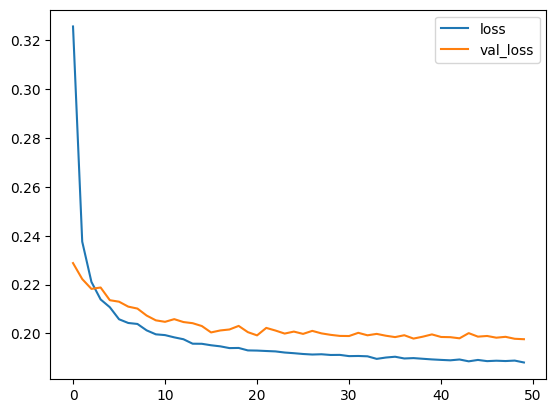

In [10]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

# 2) Evaluate Dropout

Recall from Course 4 that this model tended to overfit the data around epoch 5. Did adding dropout seem to help prevent overfitting this time?

-->> From the learning curves, we can see that the validation loss remains near a constant minimum even though the training loss continues to decrease. So we can see that adding dropout did prevent overfitting this time. Moreover, by making it harder for the network to fit spurious patterns, dropout may have encouraged the network to seek out more of the true patterns, possibly improving the validation loss some as well.

Now, we'll switch topics to explore how batch normalization can fix problems in training.

Load the *Concrete* dataset. We won't do any standardization this time. This will make the effect of batch normalization much more apparent.

In [11]:
import pandas as pd

concrete = pd.read_csv('dl-course-data/concrete.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

c:\Users\samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum Validation Loss: 24.9082


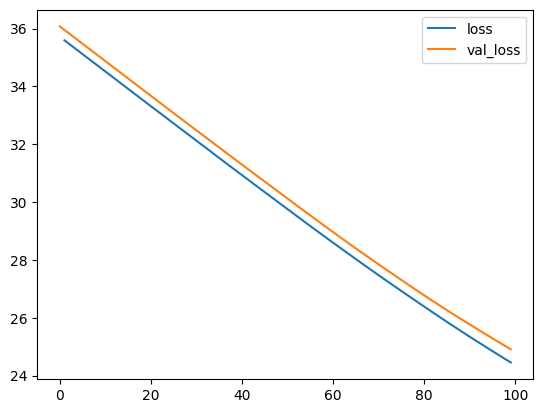

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

# 3) Add Batch Normalization Layers

Batch normalization can help correct problems like this.

Add four `BatchNormalization` layers, one before each of the dense layers. (Remember to move the `input_shape` argument to the new first layer.)

In [13]:
#Add a BatchNormalization layer before each Dense layer
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])


Let's see if batch normalization will let us train the model.

Minimum Validation Loss: 3.9560


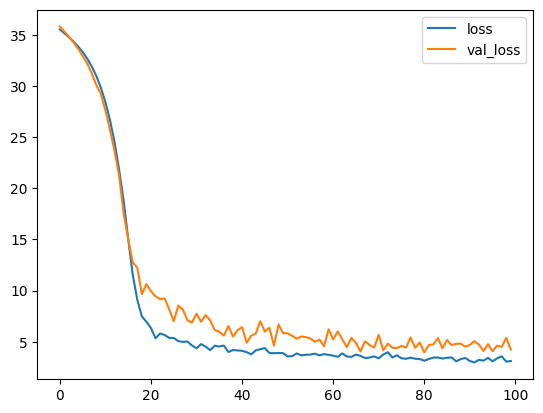

In [14]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

# 4) Evaluate Batch Normalization

Did adding batch normalization help?

--->>> We can see that adding batch normalization was a big improvement on the first attempt! By adaptively scaling the data as it passes through the network, batch normalization can let us train models on difficult datasets.